In [139]:
# downloading of useful libraries
import pandas as pd
import numpy as np
import spacy
import plotly.express as px

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD

import wordcloud
import matplotlib.pyplot as plt

In [140]:
# downloading of the dataset
dataset = pd.read_csv("sample-data.csv")
dataset.head()

id                                        description
0   1  Active classic boxers - There's a reason why o...
1   2  Active sport boxer briefs - Skinning up Glory ...
2   3  Active sport briefs - These superbreathable no...
3   4  Alpine guide pants - Skin in, climb ice, switc...
4   5  Alpine wind jkt - On high ridges, steep ice an...

In [141]:
# let's have a look at the size of the dataset
dataset.shape

(500, 2)

#### 1- Data preparation

In [142]:
# creation of a new column with text cleaned.
# firts we put all the character in lower case, and in case of we replace na by empty cell
dataset["description_clean"] = dataset["description"].fillna("").apply(lambda x : x.lower())

In [143]:
# we remove html tag
dataset["description_clean"] = dataset["description_clean"].fillna("").replace(r"<.*?>", " ", regex=True)

In [144]:
# we replace non alphanumerical character by a space
dataset["description_clean"] = dataset["description_clean"].fillna("").replace(r"[^A-Za-z0-9]+"," ", regex=True)

In [145]:
# downloading of the dictionnary in english and stop words
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS
nlp = en_core_web_sm.load()

In [146]:
# creation of a new column with text tokenized from text cleaned
dataset["description_tokenized"] = dataset["description_clean"].fillna("").apply(lambda x: nlp(x))

In [147]:
# lemmatization of the column with the text tokenized
dataset["description_tokenized"] = dataset["description_tokenized"].fillna("").apply(lambda x: [token.lemma_ for token in x if token.text not in STOP_WORDS])

In [148]:
# let's have a look at the job
dataset.head()

id                                        description  \
0   1  Active classic boxers - There's a reason why o...   
1   2  Active sport boxer briefs - Skinning up Glory ...   
2   3  Active sport briefs - These superbreathable no...   
3   4  Alpine guide pants - Skin in, climb ice, switc...   
4   5  Alpine wind jkt - On high ridges, steep ice an...   

                                   description_clean  \
0  active classic boxers there s a reason why our...   
1  active sport boxer briefs skinning up glory re...   
2  active sport briefs these superbreathable no f...   
3  alpine guide pants skin in climb ice switch to...   
4  alpine wind jkt on high ridges steep ice and a...   

                               description_tokenized  
0  [active, classic, boxer, s, reason, boxer, cul...  
1  [active, sport, boxer, brief, skin, glory, req...  
2  [active, sport, brief, superbreathable, fly, b...  
3  [alpine, guide, pant, skin, climb, ice, switch...  
4  [alpine, wind, jkt, high, ridge, steep, ice, a...

In [149]:
# join all the words in the column with text tokenized in order to have again a sentence
dataset["description_tokenized"] = dataset["description_tokenized"].apply(lambda x : " ".join(x))

In [150]:
# let's have a look at the job
dataset.head()

id                                        description  \
0   1  Active classic boxers - There's a reason why o...   
1   2  Active sport boxer briefs - Skinning up Glory ...   
2   3  Active sport briefs - These superbreathable no...   
3   4  Alpine guide pants - Skin in, climb ice, switc...   
4   5  Alpine wind jkt - On high ridges, steep ice an...   

                                   description_clean  \
0  active classic boxers there s a reason why our...   
1  active sport boxer briefs skinning up glory re...   
2  active sport briefs these superbreathable no f...   
3  alpine guide pants skin in climb ice switch to...   
4  alpine wind jkt on high ridges steep ice and a...   

                               description_tokenized  
0  active classic boxer s reason boxer cult favor...  
1  active sport boxer brief skin glory require mo...  
2  active sport brief superbreathable fly brief m...  
3  alpine guide pant skin climb ice switch rock t...  
4  alpine wind jkt high ridge steep ice alpine ja...

#### 2 - Data preprocessing

In [151]:
# instanciate TfidVecorizer
vectorizer = TfidfVectorizer(stop_words="english")

In [152]:
# Use of TFid on the column tokenized
X=vectorizer.fit_transform(dataset["description_tokenized"])

In [153]:
dense = X.toarray()
dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [154]:
vectorizer.vocabulary_

{'active': 319,
 'classic': 801,
 'boxer': 628,
 'reason': 2676,
 'cult': 1014,
 'favorite': 1387,
 'cool': 939,
 'especially': 1315,
 'sticky': 3192,
 'situation': 3017,
 'quick': 2633,
 'dry': 1198,
 'lightweight': 2007,
 'underwear': 3574,
 'minimal': 2179,
 'space': 3116,
 'travel': 3491,
 'pack': 2388,
 'expose': 1348,
 'brush': 658,
 'waistband': 3689,
 'offer': 2327,
 'skin': 3028,
 'softness': 3097,
 'panel': 2407,
 'construction': 916,
 'traditional': 3475,
 'fit': 1433,
 'functional': 1536,
 'fly': 1476,
 'oz': 2385,
 '100': 3,
 'recycle': 2685,
 'polyester': 2530,
 'moisture': 2204,
 'wicke': 3764,
 'performance': 2460,
 'inseam': 1839,
 'size': 3018,
 'recyclable': 2684,
 'common': 872,
 'thread': 3411,
 'program': 2586,
 'silky': 2996,
 'capilene': 712,
 'fabric': 1365,
 'ultralight': 3554,
 'breathable': 636,
 'elastic': 1247,
 'comfort': 863,
 'gladiodor': 1579,
 'natural': 2254,
 'odor': 2326,
 'control': 929,
 'garment': 1551,
 'weight': 3741,
 '99': 294,
 'mexico': 21

In [155]:
# matrix of vocabulary
matrix = pd.DataFrame(dense, columns=[x for x in vectorizer.get_feature_names_out()])
matrix.head()

000   03        10       100  1000  1021  1027  103  1038  1055  ...  yvon  \
0  0.0  0.0  0.000000  0.075858   0.0   0.0   0.0  0.0   0.0   0.0  ...   0.0   
1  0.0  0.0  0.000000  0.000000   0.0   0.0   0.0  0.0   0.0   0.0  ...   0.0   
2  0.0  0.0  0.000000  0.000000   0.0   0.0   0.0  0.0   0.0   0.0  ...   0.0   
3  0.0  0.0  0.000000  0.000000   0.0   0.0   0.0  0.0   0.0   0.0  ...   0.0   
4  0.0  0.0  0.049334  0.048673   0.0   0.0   0.0  0.0   0.0   0.0  ...   0.0   

   zest  zinger  zip  zipped    zipper  zippered  zipping  zips  zone  
0   0.0     0.0  0.0     0.0  0.000000  0.000000      0.0   0.0   0.0  
1   0.0     0.0  0.0     0.0  0.000000  0.000000      0.0   0.0   0.0  
2   0.0     0.0  0.0     0.0  0.000000  0.000000      0.0   0.0   0.0  
3   0.0     0.0  0.0     0.0  0.049926  0.264379      0.0   0.0   0.0  
4   0.0     0.0  0.0     0.0  0.149844  0.000000      0.0   0.0   0.0  

[5 rows x 3833 columns]

In [156]:
matrix.shape

(500, 3833)

3- DBSCAN

In [157]:
# instanciate DBSCAN with values for the main parameters, and train
db=DBSCAN(eps=0.6, min_samples=7, metric="cosine")
db.fit(matrix)

DBSCAN(eps=0.6, metric='cosine', min_samples=7)

In [158]:
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [159]:
value = pd.Series(np.unique(db.labels_))
value

0     -1
1      0
2      1
3      2
4      3
5      4
6      5
7      6
8      7
9      8
10     9
11    10
12    11
13    12
14    13
15    14
dtype: int64

In [160]:
db.labels_

array([-1, -1, -1, -1,  9,  6,  0,  1, -1, -1, -1, -1, -1, -1, 14, 14, -1,
        2, -1,  2,  2,  2,  2,  2,  2,  3, -1, -1, -1, -1,  0,  4, -1,  4,
       -1,  3,  4, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1,  5, -1, -1, -1,
       -1, -1, -1, -1,  3, -1,  3, -1,  2,  2, -1,  3,  3,  3, -1,  6,  3,
        5, -1,  3,  3,  3, -1, -1, -1, -1, -1,  7,  7,  7, 13, -1, -1,  6,
        6,  8,  8,  8,  8, -1, -1, -1, -1,  3,  9,  9,  3, -1, -1, -1,  3,
       -1,  0, 13, 13,  6, 10, 10, 10, -1, -1, -1, -1, -1,  3, -1, 10, 10,
       -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  3,  3, -1,  6, -1, -1,  3, -1, -1,  9,  7, -1, 11, -1,  3, 11,
       11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1,  3,  3,
        2,  2,  2,  2,  2,  2,  3,  3, -1, -1, -1, -1, -1, -1,  3, 10, -1,
       12, -1, -1, -1, -1, -1, -1, -1, -1,  6, -1, -1,  8,  8,  8,  8, -1,
       -1, -1,  9,  9,  9,  9, -1,  6, -1, -1, -1, -1, -1, -1,  1,  1, -1,
       -1, 12, 12, -1, -1

In [161]:
dataset["cluster"] = db.labels_
dataset.head()

id                                        description  \
0   1  Active classic boxers - There's a reason why o...   
1   2  Active sport boxer briefs - Skinning up Glory ...   
2   3  Active sport briefs - These superbreathable no...   
3   4  Alpine guide pants - Skin in, climb ice, switc...   
4   5  Alpine wind jkt - On high ridges, steep ice an...   

                                   description_clean  \
0  active classic boxers there s a reason why our...   
1  active sport boxer briefs skinning up glory re...   
2  active sport briefs these superbreathable no f...   
3  alpine guide pants skin in climb ice switch to...   
4  alpine wind jkt on high ridges steep ice and a...   

                               description_tokenized  cluster  
0  active classic boxer s reason boxer cult favor...       -1  
1  active sport boxer brief skin glory require mo...       -1  
2  active sport brief superbreathable fly brief m...       -1  
3  alpine guide pant skin climb ice switch rock t...       -1  
4  alpine wind jkt high ridge steep ice alpine ja...        9

In [162]:
# size of each clusters found
for i in value :
    mask = (dataset["cluster"] == i)
    sample1 = dataset.loc[mask,"description"]
    print("cluster {}, number of items : {}".format(i, sample1.shape[0]))

cluster -1, number of items : 283
cluster 0, number of items : 11
cluster 1, number of items : 9
cluster 2, number of items : 30
cluster 3, number of items : 54
cluster 4, number of items : 11
cluster 5, number of items : 8
cluster 6, number of items : 22
cluster 7, number of items : 8
cluster 8, number of items : 15
cluster 9, number of items : 12
cluster 10, number of items : 10
cluster 11, number of items : 7
cluster 12, number of items : 7
cluster 13, number of items : 7
cluster 14, number of items : 6


In [163]:
# samples of rows for each clusters
for i in range (-1,15,1) :
    mask = (dataset["cluster"] == i)
    try :
        sample = dataset.loc[mask,"description"]
        print("Samples for cluster {}".format(i))
        print(sample.sample(3))
        print()
    except :
        print("No sample found for class {}".format(i))
    

Samples for cluster -1
182    Gravitee tank - The Gravitee's racerback and f...
232    Undercover cami - Morph from water-logged sea ...
221    Solid bibiana top - The athletic Bibiana Top's...
Name: description, dtype: object

Samples for cluster 0
485    Half mass - Sized for riding a bike and finely...
353    Single shot - The Single Shot organizes your d...
429    Mlc - The secret to slipping through O'Hare's ...
Name: description, dtype: object

Samples for cluster 1
239    Print bayonne btm - The low-rise Bayonne Botto...
290    Print adour btm - Adours have a slightly scoop...
261    Print sunamee btm - Stay-put Sunamees fit stra...
Name: description, dtype: object

Samples for cluster 2
442    Cap 3 crew - Fundamental to the funhog lifesty...
439    Cap 3 bottoms - The unwavering foundation for ...
486    Cap 1 crew - When it comes to moisture, this l...
Name: description, dtype: object

Samples for cluster 3
470    Baby live simply seal t-shirt - Swim, fish, ha...
432    Girl'

In [164]:
# instantiate wordcloud
wd = wordcloud.WordCloud()

CLUSTER  -1


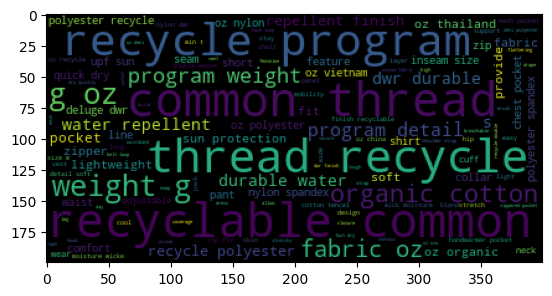

-----------
CLUSTER  3


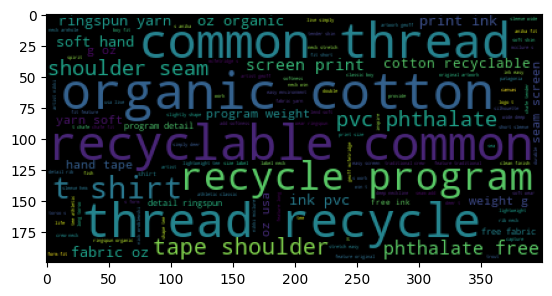

-----------
CLUSTER  2


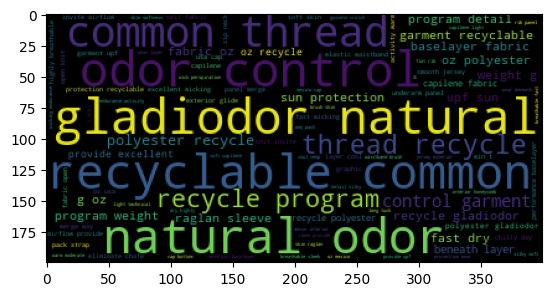

-----------
CLUSTER  6


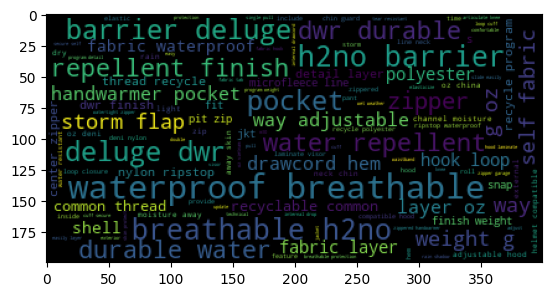

-----------
CLUSTER  8


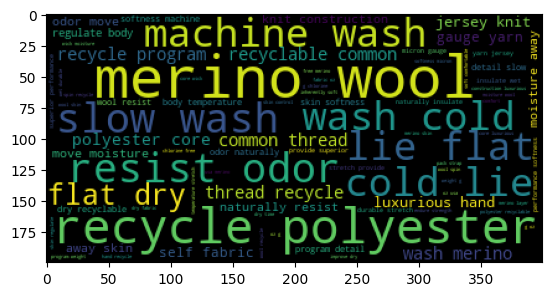

-----------
CLUSTER  9


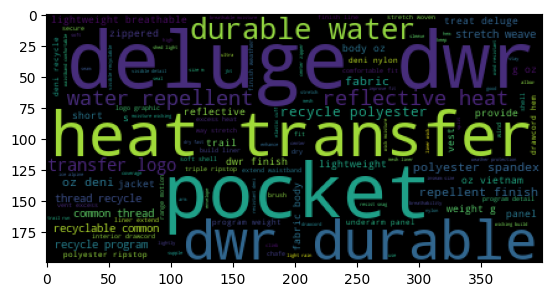

-----------
CLUSTER  0


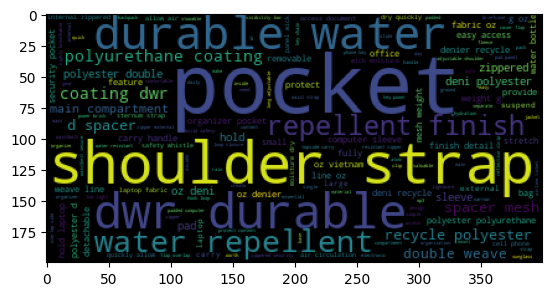

-----------
CLUSTER  4


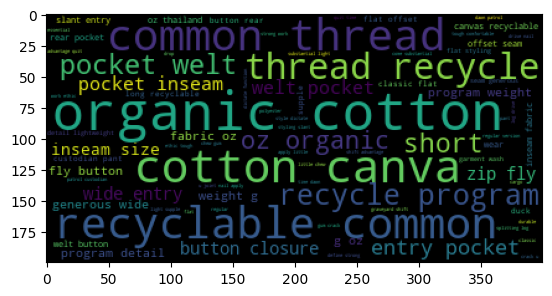

-----------
CLUSTER  10


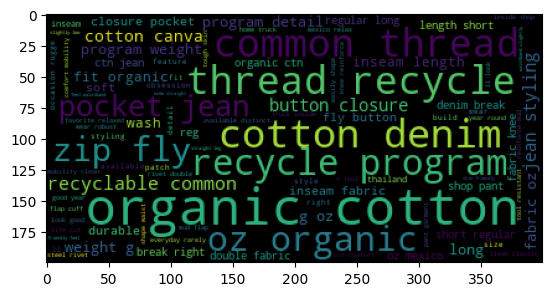

-----------
CLUSTER  1


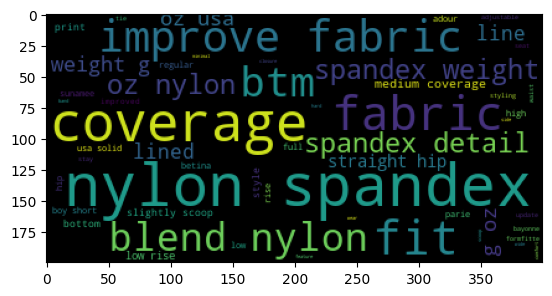

-----------
CLUSTER  5


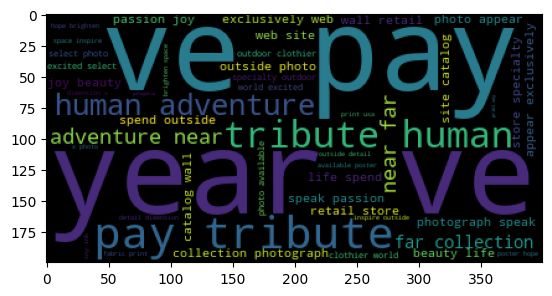

-----------
CLUSTER  7


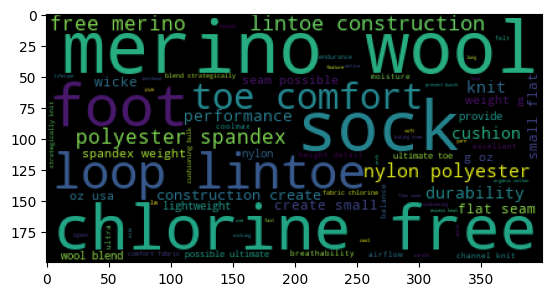

-----------
CLUSTER  13


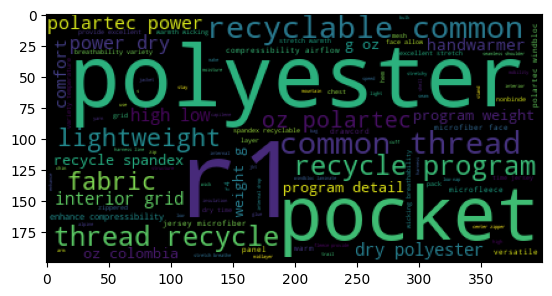

-----------
CLUSTER  11


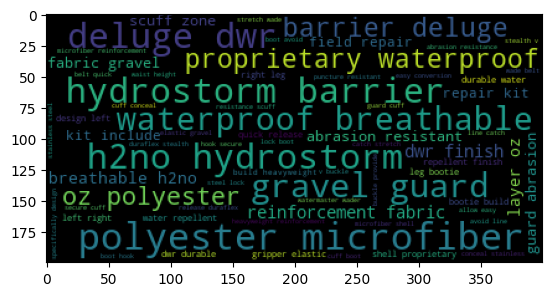

-----------
CLUSTER  12


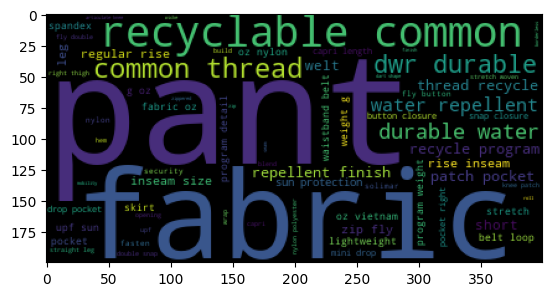

-----------
CLUSTER  14


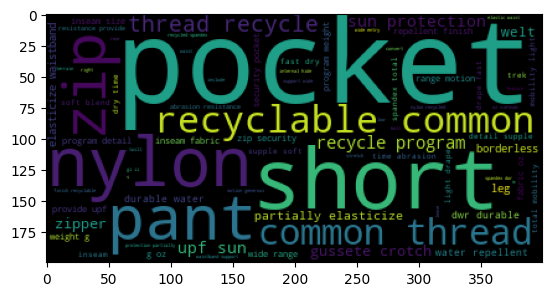

-----------


In [165]:
# visualization of main words for each clusters
for c in dataset['cluster'].value_counts().index :
    print("CLUSTER ", c)
    texts = " ".join(dataset.loc[dataset['cluster']==c,'description_tokenized'])
    cloud = wd.generate(texts)
    plt.imshow(cloud)
    plt.show()
    print('-----------')

In [166]:
# function in order to find samples (5 in the example) from an input choosen by the user (input)
def find_similar_items(id_item) :
    cluster_id = dataset.loc[dataset["id"]==10,"cluster"].values[0] # .values pour enlever les index et ne garder que la valeur
    mask = (dataset["cluster"] == cluster_id)
    liste = dataset.loc[mask,"description"].sample(5) 
    if len(liste) == 0 :
        print("pas d'autre article trouvé :")
    else :
        print(liste)

choix = input("choose an id between 1 and 500:")
find_similar_items(choix)

284    Ester top - Throw on the Ester Top for a quick...
215    Simple guide jkt - Skin-in by headlamp, summit...
32     Deep wading jkt - Whether you're chasing Olymp...
438    Guidewater duffle - large - Whoever said getti...
160    Aravis jkt - The highly adaptable Aravis Jacke...
Name: description, dtype: object


4 - SVD Model

In [167]:
# Instantiate model with values for main parameters, and fit
svd_model = TruncatedSVD(n_components=10, n_iter=100, random_state=0)
lsa = svd_model.fit_transform(matrix)

In [168]:
# creation of a dataframe with coef for each topic, and a column with the tokenized text
topic_encoded_df = pd.DataFrame(lsa, columns=["topic_{}".format(i+1) for i in range(10)], index = dataset.index)
topic_encoded_df["documents"]=dataset["description_tokenized"]
topic_encoded_df

topic_1   topic_2   topic_3   topic_4   topic_5   topic_6   topic_7  \
0    0.278233 -0.045958  0.184359  0.083938 -0.122873 -0.014662 -0.055467   
1    0.277866 -0.060689  0.097423  0.096460 -0.011016  0.106851 -0.061501   
2    0.265909 -0.082200  0.110598  0.027234 -0.017384  0.115961  0.012061   
3    0.382988 -0.252585 -0.115812 -0.139265  0.049480 -0.010041 -0.018968   
4    0.395487 -0.268967 -0.025769 -0.234405 -0.037164 -0.024746  0.050016   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.334433 -0.078282  0.391558  0.070603 -0.261080 -0.039831 -0.037203   
496  0.371022 -0.075686  0.489173 -0.010508 -0.302613 -0.044846  0.002745   
497  0.344310 -0.222932 -0.069260 -0.247970 -0.013447 -0.150549  0.138611   
498  0.330005  0.052317 -0.130341  0.315485  0.025854 -0.139097 -0.117941   
499  0.393826  0.050356 -0.187955  0.348455  0.017231 -0.154037 -0.108315   

      topic_8   topic_9  topic_10  \
0   -0.019216 -0.149581  0.001630   
1   -0.023856 -0.109068 -0.072621   
2    0.057730 -0.058763 -0.012502   
3   -0.053827 -0.052572 -0.152228   
4    0.044135  0.041475 -0.195193   
..        ...       ...       ...   
495 -0.097534 -0.341436  0.033678   
496 -0.003769 -0.241649  0.108678   
497 -0.169114  0.052856  0.039383   
498 -0.004451 -0.085074  0.024806   
499 -0.001082 -0.072342  0.019956   

                                             documents  
0    active classic boxer s reason boxer cult favor...  
1    active sport boxer brief skin glory require mo...  
2    active sport brief superbreathable fly brief m...  
3    alpine guide pant skin climb ice switch rock t...  
4    alpine wind jkt high ridge steep ice alpine ja...  
..                                                 ...  
495  cap 2 bottom cut loose madden crowd search und...  
496  cap 2 crew crew take edge fickle weather clear...  
497  time shell need use morning time umbrella time...  
498  wear cargo short wear cargo short bask glory s...  
499  wear short time simplify wear short prove shor...  

[500 rows x 11 columns]

In [169]:
# creation of a column class_pred with the main topic
topic_encoded_df["class_pred"] = [np.argmax(topic) for topic in lsa]

# Distribution of the different topics
topic_encoded_df["class_pred"].value_counts()

class_pred
0    277
1     61
2     35
7     27
5     24
9     20
8     19
3     15
4     12
6     10
Name: count, dtype: int64

In [170]:
# overview of the new dataframe with topic's coefficient and class prediction
topic_encoded_df.head()

topic_1   topic_2   topic_3   topic_4   topic_5   topic_6   topic_7  \
0  0.278233 -0.045958  0.184359  0.083938 -0.122873 -0.014662 -0.055467   
1  0.277866 -0.060689  0.097423  0.096460 -0.011016  0.106851 -0.061501   
2  0.265909 -0.082200  0.110598  0.027234 -0.017384  0.115961  0.012061   
3  0.382988 -0.252585 -0.115812 -0.139265  0.049480 -0.010041 -0.018968   
4  0.395487 -0.268967 -0.025769 -0.234405 -0.037164 -0.024746  0.050016   

    topic_8   topic_9  topic_10  \
0 -0.019216 -0.149581  0.001630   
1 -0.023856 -0.109068 -0.072621   
2  0.057730 -0.058763 -0.012502   
3 -0.053827 -0.052572 -0.152228   
4  0.044135  0.041475 -0.195193   

                                           documents  class_pred  
0  active classic boxer s reason boxer cult favor...           0  
1  active sport boxer brief skin glory require mo...           0  
2  active sport brief superbreathable fly brief m...           0  
3  alpine guide pant skin climb ice switch rock t...           0  
4  alpine wind jkt high ridge steep ice alpine ja...           0

CLUSTER  0


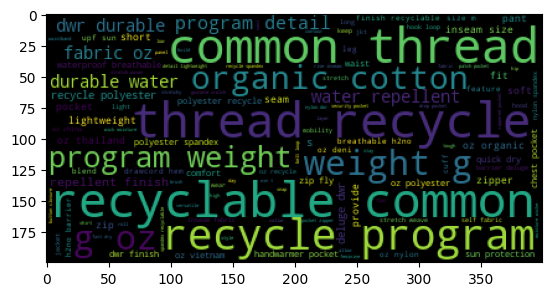

-----------
CLUSTER  1


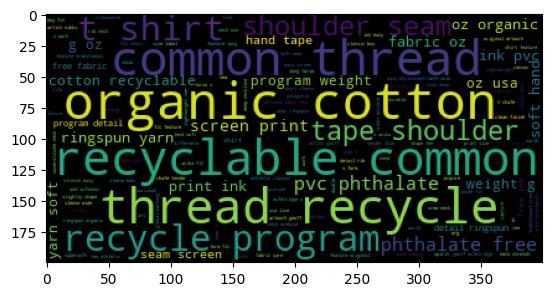

-----------
CLUSTER  2


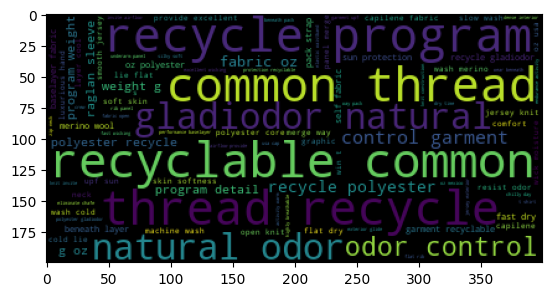

-----------
CLUSTER  7


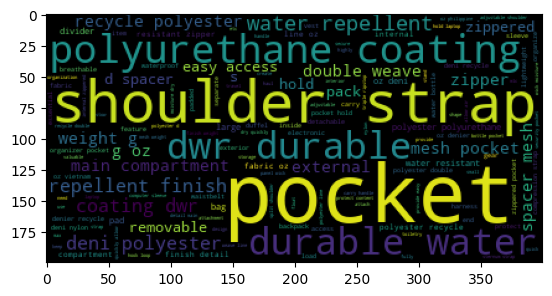

-----------
CLUSTER  5


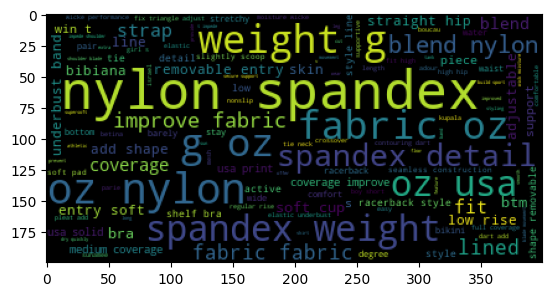

-----------
CLUSTER  9


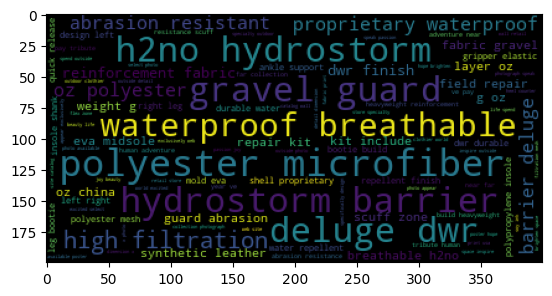

-----------
CLUSTER  8


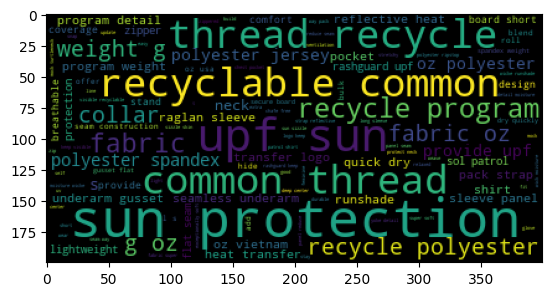

-----------
CLUSTER  3


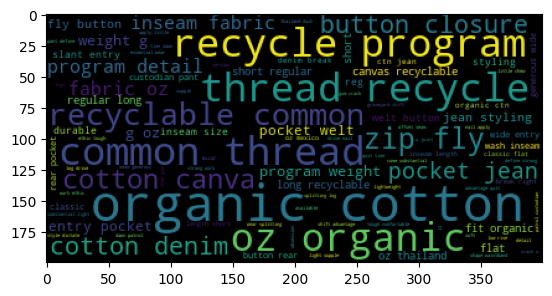

-----------
CLUSTER  4


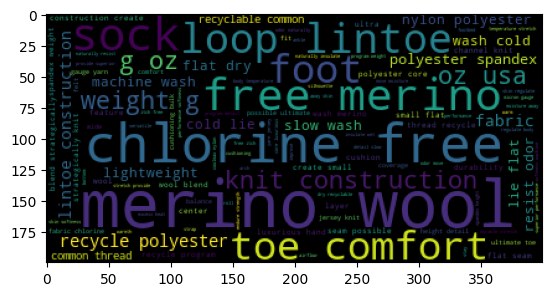

-----------
CLUSTER  6


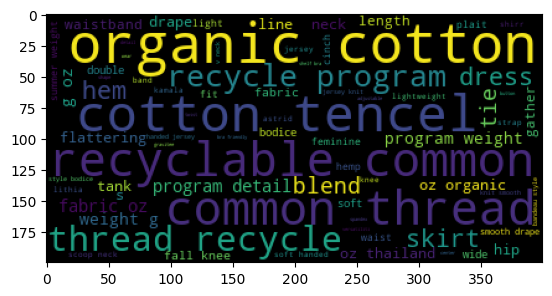

-----------


In [171]:
# visualization of a wordcloud for each cass
for c in topic_encoded_df['class_pred'].value_counts().index :
    print("CLUSTER ", c)
    texts = " ".join(topic_encoded_df.loc[topic_encoded_df['class_pred']==c,'documents'])
    cloud = wd.generate(texts)
    plt.imshow(cloud)
    plt.show()
    print('-----------')

In [172]:
# Create DataFrame containing the description of each topic in terms of the words in the vocabulary
topics_description = pd.DataFrame(svd_model.components_, columns = vectorizer.get_feature_names_out(), 
                                  index = ['topic_' + str(i) for i in range(svd_model.components_.shape[0])])

# Compute absolute values of coefficients
topics_description = topics_description.apply(np.abs, axis = 1)

topics_description.head()

000        03        10       100      1000      1021      1027  \
topic_0  0.002540  0.000543  0.049019  0.131556  0.000400  0.000318  0.000248   
topic_1  0.000252  0.000743  0.009239  0.053766  0.000489  0.000459  0.000276   
topic_2  0.001212  0.000710  0.046279  0.016830  0.000421  0.000325  0.000134   
topic_3  0.003982  0.001399  0.085361  0.056715  0.001166  0.000673  0.000097   
topic_4  0.002264  0.000344  0.012059  0.062955  0.000381  0.000064  0.000039   

              103      1038      1055  ...      yvon      zest    zinger  \
topic_0  0.012129  0.000423  0.000191  ...  0.001639  0.001138  0.000637   
topic_1  0.023150  0.000591  0.000274  ...  0.004780  0.001406  0.000852   
topic_2  0.000631  0.000542  0.000121  ...  0.000703  0.000266  0.000818   
topic_3  0.005875  0.001255  0.000203  ...  0.003095  0.002590  0.000847   
topic_4  0.003024  0.000242  0.000317  ...  0.000554  0.000681  0.000339   

              zip    zipped    zipper  zippered   zipping      zips      zone  
topic_0  0.084749  0.000894  0.086274  0.067284  0.001780  0.001775  0.007086  
topic_1  0.058853  0.001061  0.102269  0.079123  0.002678  0.002392  0.010957  
topic_2  0.067780  0.000387  0.049354  0.060539  0.001993  0.001911  0.001495  
topic_3  0.073960  0.000983  0.119710  0.062736  0.004930  0.001190  0.017206  
topic_4  0.021782  0.000103  0.013027  0.011275  0.000593  0.000397  0.020104  

[5 rows x 3833 columns]